- Julia Noriko 
- Murilo Holtz Foltran

# Projeto 04 - Modelo SIR

## Introdução 
Considerando que estamos vivendo um momento de pandemia, iremos implementar neste projeto o modelo SIR para a Covid-19 em que a população total é constante(N), classificadas entre pessoas suscetíveis(S), infectadas(I) e recuperadas(R), temos que N=S+I+R. O modelo utilizou a integração pelo método de Euler aplicando a função *scipy.integrate.odeint* no modelo trabalhado.

Os cenários são modificados a partir da alteração das taxas de infecção(r) e a 
taxa de recuperação(a), assim são simulados e detalhados diferentes cenários com determinados valores para essas taxas que permitem exemplificar o que acontece com uma população que inicialmente possui 10 pessoas infectadas e 300 pessoas sucetíveis, sem nenhuma pessoa recuperada. 

Com essas simulações podemos observar como doenças podem iniciar infectando poucas pessoas e em pouco tempo ter infectado grande parte da população, ou então como diminuir o número de pessoas infectadas tentando diminuir a taxa de infecção da doença. 

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 

In [ ]:
def ModeloSIR(y, t, r, a):
  S, I, R = y
  N=S+I+R
  dS = -r*S*I/N
  dI = r*S*I/N-a*I
  dR = a*I
  return(dS, dI, dR)

Nesse caso, observa-se um cenário com uma taxa de infecção r=0.6. Pode-se perceber, então, um **pico de infectados**. Isso também é consequência direta da taxa de recuperação (a), que representa a disponibilidade de medicamentos e tratamento médico.


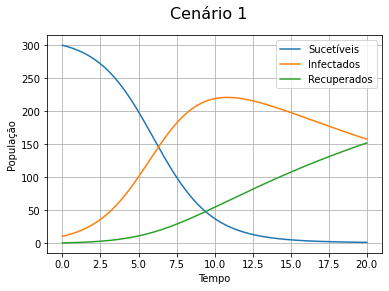

Número máximo de infectados: 221.0


In [ ]:
s0 = 300 #População sucetível
i0 = 10 #População infectada
r0 = 0 #População recuperado

r = 0.60
a = 0.05

#vetor do tempo
t = np.linspace(0, 20, 10000)

s = scipy.integrate.odeint(ModeloSIR, [s0, i0, r0], t, args=(r, a))
s = np.array(s)

#plotando
plt.figure(figsize=[6,4])
plt.plot(t, s[:,0], label="Sucetíveis")
plt.plot(t, s[:,1], label="Infectados")
plt.plot(t, s[:,2], label="Recuperados")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 1', fontsize=16)

plt.show()
#Calculando o número máximo de infectados atingidos ao longo da doença
maior=max(s[:,1])
if maior == round(maior):
  print("Número máximo de infectados:", maior)   
else:
  print("Número máximo de infectados:", round(maior+0.5) )


Considerando um cenário com a taxa de infecção muito alta(r=0.9), contando que não há isolamento social e a taxa de recuperação é muito baixa(a=0.02), poucos recursos para medicamento e tratamento médico limitado.
Podemos verificar que o pico de infectados é extremamente maior que o cenário anterior e que em um curto período de tempo, praticamente toda a população utilizada na simulação esta infectada. Sendo que o pico só diminui porque as pessoas começam a se recuperar aos poucos, com a disponibilidade de medicamentos e tratamento médico. Porém leva-se mais que o dobro do tempo de infecção para as pessoas se recuperarem, assim o número de pessoas recuperadas só será maior que o número de infectados quase na metade do tempo analisado.

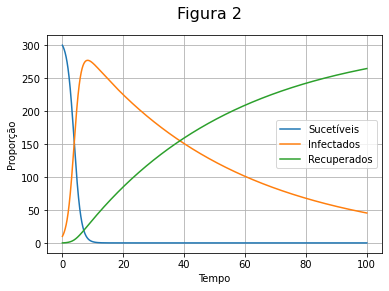

Número máximo de infectados: 278.0


In [ ]:
s0 = 300 #População sucetível
i0 = 10 #População infectada
r0 = 0 #População recuperado

r = 0.90
a = 0.02

#vetor do tempo
t = np.linspace(0, 100, 10000)

s = scipy.integrate.odeint(ModeloSIR, [s0, i0, r0], t, args=(r, a))
s = np.array(s)

#plotando
plt.figure(figsize=[6,4])
plt.plot(t, s[:,0], label="Sucetíveis")
plt.plot(t, s[:,1], label="Infectados")
plt.plot(t, s[:,2], label="Recuperados")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 2', fontsize=16)

plt.show()

#Calculando o número máximo de infectados atingidos ao longo da doença
maior=max(s[:,1])
if maior == round(maior):
  print("Número máximo de infectados:", maior)   
else:
  print("Número máximo de infectados:", round(maior+0.5) )

Nesse caso, há uma taxa de infecção mais baixa, representando o **isolamento social** da população. Por isso, uma disponibilidade maior de medicamentos e tratamento. 
Pode-se reparar, então, um **achatamento** da curva de infectados.
E quando comparamos o número máximo de pessoas que foram infectadas do cenário analisado com os demais cenários acima, podemos perceber que esse número é extremamente menor que os demais picos.
Além disso, há pessoas que não foram infectadas.

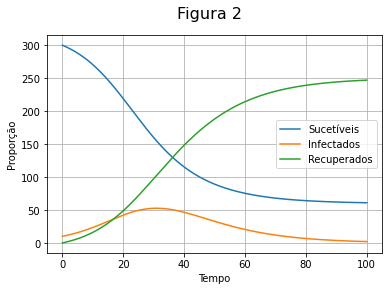

Número máximo de infectados: 53.0


In [ ]:
s0 = 300 #População sucetível
i0 = 10 #População infectada
r0 = 0 #População recuperado

r = 0.20
a = 0.10

#vetor do tempo
t = np.linspace(0, 100, 10000)

s = scipy.integrate.odeint(ModeloSIR, [s0, i0, r0], t, args=(r, a))
s = np.array(s)

#plotando
plt.figure(figsize=[6,4])
plt.plot(t, s[:,0], label="Sucetíveis")
plt.plot(t, s[:,1], label="Infectados")
plt.plot(t, s[:,2], label="Recuperados")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 3', fontsize=16)

plt.show()
#Calculando o número máximo de infectados atingidos ao longo da doença
maior=max(s[:,1])
if maior == round(maior):
  print("Número máximo de infectados:", maior)   
else:
  print("Número máximo de infectados:", round(maior+0.5) )

Se considerarmos um cenário o qual a taxa de recuperação é bem baixa(a=0.05) não há tratamento médico e medicamento para todos, para que continuemos com o achatamento da curva de infecção, é necessário que aumentemos o isolamento social, diminuindo ainda mais a taxa de infecção. Esse é o único modo de achatar essa curva, visto que não há recursos disponíveis para aumentar a taxa de recuperação.

Podemos ver a diferença entre as curvas, no primeiro gráfico abaixo a taxa de recuperação diminuiu e se manteve a taxa de infecção, com isso a curva de infectados aumentou e seu pico dobrou em comparação ao cenário anterior.
Já no segundo gráfico, diminui-se a taxa de recuperação e também a taxa de infecção(aumentando o isolamento social) e a curva continuou achatada, o que mostra que a propagação da infecção obteve diminuição quando a taxa de infecção diminuiu também. Além do mais as curvas de recuperação e de infecção estão muito próximas, demostrando o equilíbrio entre as pessoas que são infectadas e as pessoas que são recuperadas.

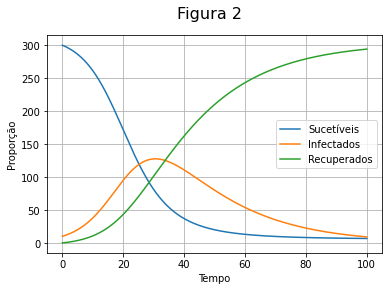

Número máximo de infectados: 128.0


In [ ]:
s0 = 300 #População sucetível
i0 = 10 #População infectada
r0 = 0 #População recuperado

r = 0.20
a = 0.05

#vetor do tempo
t = np.linspace(0, 100, 10000)

s = scipy.integrate.odeint(ModeloSIR, [s0, i0, r0], t, args=(r, a))
s = np.array(s)

#plotando
plt.figure(figsize=[6,4])
plt.plot(t, s[:,0], label="Sucetíveis")
plt.plot(t, s[:,1], label="Infectados")
plt.plot(t, s[:,2], label="Recuperados")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 4', fontsize=16)

plt.show()
#Calculando o número máximo de infectados atingidos ao longo da doença
maior=max(s[:,1])
if maior == round(maior):
  print("Número máximo de infectados:", maior)   
else:
  print("Número máximo de infectados:", round(maior+0.5) )

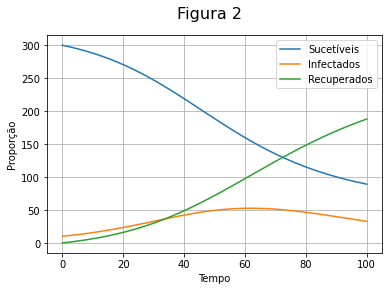

Número máximo de infectados: 53.0


In [ ]:
s0 = 300 #População sucetível
i0 = 10 #População infectada
r0 = 0 #População recuperado

r = 0.10
a = 0.05

#vetor do tempo
t = np.linspace(0, 100, 10000)

s = scipy.integrate.odeint(ModeloSIR, [s0, i0, r0], t, args=(r, a))
s = np.array(s)

#plotando
plt.figure(figsize=[6,4])
plt.plot(t, s[:,0], label="Sucetíveis")
plt.plot(t, s[:,1], label="Infectados")
plt.plot(t, s[:,2], label="Recuperados")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 5', fontsize=16)

plt.show()
#Calculando o número máximo de infectados atingidos ao longo da doença
maior=max(s[:,1])
if maior == round(maior):
  print("Número máximo de infectados:", maior)   
else:
  print("Número máximo de infectados:", round(maior+0.5) )

Nesse cenário consideramos que a taxa de infecção é alta(r=0.8), não há isolamento social, porém há uma taxa de recuperação relativamente alta(0.4), há tratamento médico e medicamentos suficientes, assim pode-se notar que o número de infectados possui um pico no início, porém ele logo é atenuado(não infectando muitas pessoas) e o número de pessoas recuperadas logo passa o número de pessoas infectadas, não possibilitando a propagação da doença.   

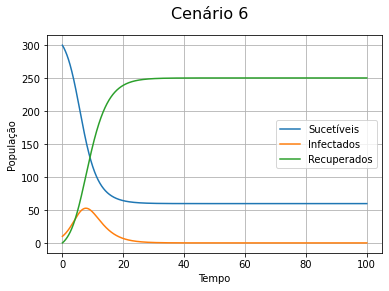

Número máximo de infectados: 53.0


In [ ]:
s0 = 300 #População sucetível
i0 = 10 #População infectada
r0 = 0 #População recuperado

r = 0.8
a = 0.4

#vetor do tempo
t = np.linspace(0, 100, 10000)

s = scipy.integrate.odeint(ModeloSIR, [s0, i0, r0], t, args=(r, a))
s = np.array(s)

#plotando
plt.figure(figsize=[6,4])
plt.plot(t, s[:,0], label="Sucetíveis")
plt.plot(t, s[:,1], label="Infectados")
plt.plot(t, s[:,2], label="Recuperados")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 6', fontsize=16)

plt.show()
#Calculando o número máximo de infectados atingidos ao longo da doença
maior=max(s[:,1])
if maior == round(maior):
  print("Número máximo de infectados:", maior)   
else:
  print("Número máximo de infectados:", round(maior+0.5) )